In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
Fraud_check = pd.read_csv('Fraud_check.csv')

In [3]:
Fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
# Renamning the data
Fraud_check1 = Fraud_check.rename({'Marital.Status':'Maritial_status','Taxable.Income':'Taxable_income','City.Population':'City_population','Work.Experience':'Work_experience'},axis = 1)
Fraud_check1

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
Fraud_check1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Maritial_status  600 non-null    object
 2   Taxable_income   600 non-null    int64 
 3   City_population  600 non-null    int64 
 4   Work_experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
Fraud_check1.describe()

,Taxable_income,City_population,Work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
Fraud_check1.isnull().sum()

Undergrad          0
Maritial_status    0
Taxable_income     0
City_population    0
Work_experience    0
Urban              0
dtype: int64

In [8]:
Fraud_check1['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [9]:
Fraud_check1['Maritial_status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Maritial_status, dtype: int64

In [10]:
Fraud_check1['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [11]:
# using one_hot encoding

label_encoder = preprocessing.LabelEncoder()

Fraud_check1['Urban'] = label_encoder.fit_transform(Fraud_check1['Urban'])
Fraud_check1['Maritial_status'] = label_encoder.fit_transform(Fraud_check1['Maritial_status'])
Fraud_check1['Undergrad'] = label_encoder.fit_transform(Fraud_check1['Undergrad'])
Fraud_check1

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [12]:
Fraud_check1['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [13]:
Fraud_check1['Taxable_income']

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable_income, Length: 600, dtype: int64

In [14]:
# changing target variable to catogerical data
#Fraud_check1["Taxable_income"]="GOOD"
#Fraud_check1.loc[Fraud_check1["Taxable_income"]<=30000,"taxable_income"]="Risky"
#Fraud_check1.drop(["Taxable_income"],axis=1,inplace=True)
#Fraud_check1

In [15]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
Fraud_check2=Fraud_check1.copy()
Fraud_check2['taxable_category'] = pd.cut(x = Fraud_check2['Taxable_income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
Fraud_check2.drop(["Taxable_income"],axis=1,inplace=True)
Fraud_check2.head()

,Undergrad,Maritial_status,City_population,Work_experience,Urban,taxable_category
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good


In [16]:
x=Fraud_check2.iloc[:,0:5]
y=Fraud_check2['taxable_category']

In [17]:
x

,Undergrad,Maritial_status,City_population,Work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [18]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_category, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [19]:
Fraud_check2['taxable_category'].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [20]:
Fraud_check2.taxable_category.value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [21]:
colnames = list(Fraud_check2.columns)
colnames

['Undergrad',
 'Maritial_status',
 'City_population',
 'Work_experience',
 'Urban',
 'taxable_category']

In [22]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [23]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

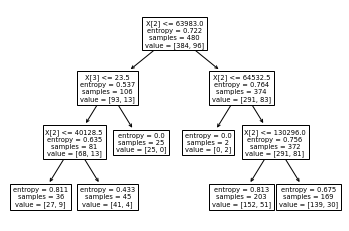

In [24]:
#PLot the decision tree
tree.plot_tree(model);

In [25]:
colnames = list(Fraud_check2.columns)
colnames

['Undergrad',
 'Maritial_status',
 'City_population',
 'Work_experience',
 'Urban',
 'taxable_category']

In [26]:
Fraud_check2['taxable_category'].value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

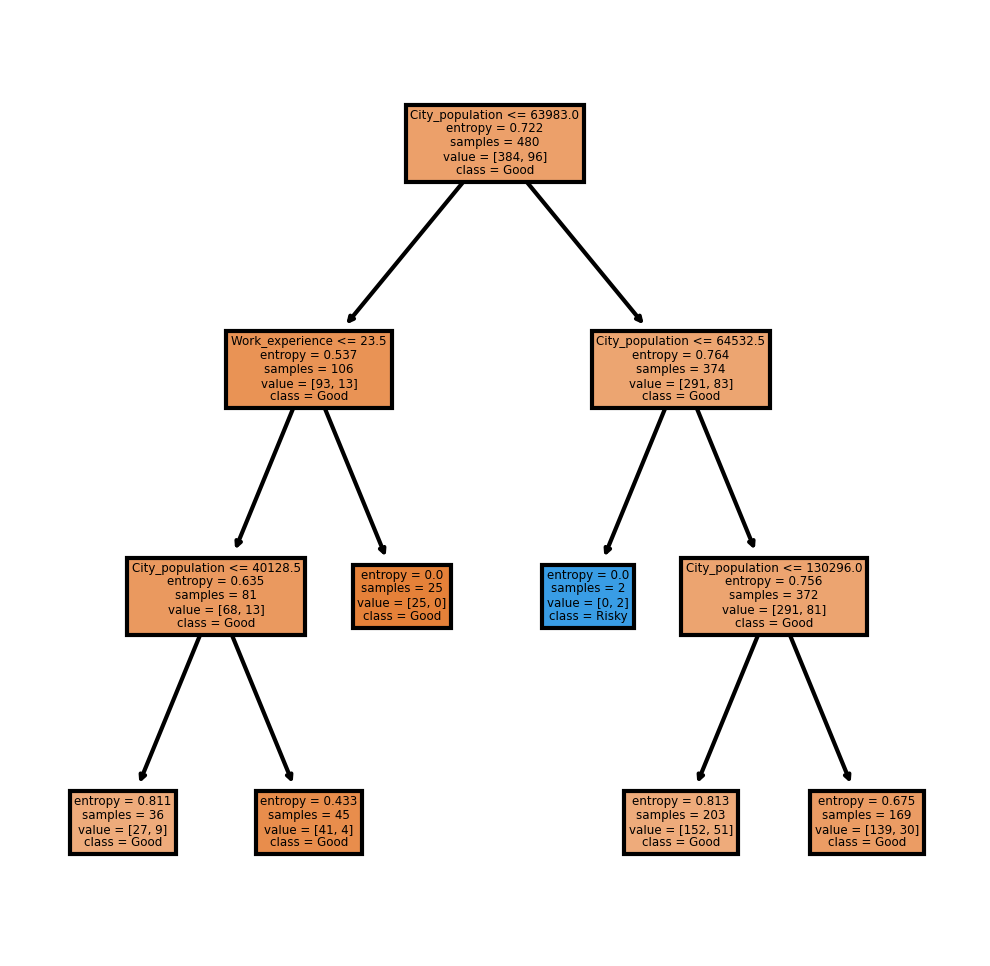

In [27]:
fn=['Undergrad','Maritial_status','City_population','Work_experience','Urban']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [28]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good    120
dtype: int64

In [29]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [30]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good
taxable_category,
Risky,28
Good,92


In [31]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

In [36]:
model.feature_importances_

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [37]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
2,City_population,0.710037
3,Work_experience,0.289963
0,Undergrad,0.000000
1,Maritial_status,0.000000
4,Urban,0.000000


## Building Decision Tree Classifier (CART) using Gini Criteria

In [32]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [33]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667